In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure inline plotting for Jupyter
%matplotlib inline

# Set pandas display options
pd.set_option('display.max_rows', 10)

In [2]:
# Load the dataset
data_filename = '/kaggle/input/international-football-results-from-1872-to-2017/results.csv'
data = pd.read_csv(data_filename, parse_dates=['date'])

In [3]:
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47320,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True
47321,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True
47322,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True
47323,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True


In [4]:
# Display basic information about the dataset
print(data.dtypes)
print("**************************")
print(data.tournament.value_counts())

date          datetime64[ns]
home_team             object
away_team             object
home_score           float64
away_score           float64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object
**************************
tournament
Friendly                                17978
FIFA World Cup qualification             8169
UEFA Euro qualification                  2824
African Cup of Nations qualification     2116
FIFA World Cup                            964
                                        ...  
Copa Confraternidad                         1
Open International Championship             1
Benedikt Fontana Cup                        1
Real Madrid 75th Anniversary Cup            1
ConIFA Challenger Cup                       1
Name: count, Length: 175, dtype: int64


In [5]:
# Filter out 'Friendly' matches
data = data.loc[data['tournament'] != 'Friendly']

In [6]:
# Filter matches after 1930
data = data.loc[data['date'].dt.year > 1930].reset_index(drop=True)

In [7]:
# Filter matches with non-tied results
data = data.loc[data['home_score'] != data['away_score']].reset_index(drop=True)

In [8]:
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1931-02-22,Italy,Austria,2.0,1.0,Central European International Cup,Milan,Italy,False
1,1931-03-15,Yugoslavia,Greece,4.0,1.0,Balkan Cup,Belgrade,Yugoslavia,False
2,1931-03-28,Scotland,England,2.0,0.0,British Home Championship,Glasgow,Scotland,False
3,1931-04-12,Austria,Czechoslovakia,2.0,1.0,Central European International Cup,Vienna,Austria,False
4,1931-04-12,Hungary,Switzerland,6.0,2.0,Central European International Cup,Budapest,Hungary,False
...,...,...,...,...,...,...,...,...,...
22570,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True
22571,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True
22572,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True
22573,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True


In [9]:
# Prepare countries dataframe
home_teams = data[['home_team']].rename(columns={'home_team': 'label'})
away_teams = data[['away_team']].rename(columns={'away_team': 'label'})
countries = pd.concat([home_teams, away_teams])
country_counts = countries['label'].value_counts().reset_index()
country_counts.columns = ['label', 'count']
countries_filtered = country_counts[country_counts['count'] >= 100].reset_index(drop=True)
countries_filtered['id'] = countries_filtered.index

In [10]:
countries_filtered

,label,count,id
0,Thailand,536,0
1,South Korea,512,1
2,Malaysia,496,2
3,Brazil,447,3
4,Indonesia,424,4
...,...,...,...
180,Brunei,102,180
181,Papua New Guinea,101,181
182,Eswatini,101,182
183,Kyrgyzstan,100,183


In [11]:
# Prepare goals dataframe
home_goals = data[['home_team', 'home_score', 'away_score']].rename(columns={'home_team': 'label', 'home_score': 'goals_for', 'away_score': 'goals_against'})
away_goals = data[['away_team', 'away_score', 'home_score']].rename(columns={'away_team': 'label', 'away_score': 'goals_for', 'home_score': 'goals_against'})
goals = pd.concat([home_goals, away_goals])
goals_summary = goals.groupby('label').sum().reset_index()
goals_filtered = goals_summary[goals_summary['label'].isin(countries_filtered['label'])]

In [12]:
goals_filtered

,label,goals_for,goals_against
2,Albania,178.0,387.0
3,Alderney,52.0,515.0
4,Algeria,503.0,276.0
7,Andorra,42.0,400.0
8,Angola,241.0,194.0
...,...,...,...
296,Wales,448.0,497.0
303,Yemen,141.0,441.0
308,Yugoslavia,396.0,224.0
309,Zambia,602.0,358.0


In [13]:
# Prepare results dataframe
results = pd.concat([home_goals, away_goals])
results['wins'] = results.apply(lambda row: 1 if row['goals_for'] > row['goals_against'] else 0, axis=1)
results['losses'] = results.apply(lambda row: 1 if row['goals_for'] < row['goals_against'] else 0, axis=1)
results_summary = results.groupby('label')[['wins', 'losses']].sum().reset_index()
results_filtered = results_summary[results_summary['label'].isin(countries_filtered['label'])]

In [14]:
results_filtered

,label,wins,losses
2,Albania,59,150
3,Alderney,3,101
4,Algeria,172,95
7,Andorra,7,131
8,Angola,92,79
...,...,...,...
296,Wales,148,177
303,Yemen,34,124
308,Yugoslavia,115,57
309,Zambia,216,127


In [15]:
# Merge dataframes to create nodes
nodes = countries_filtered.merge(goals_filtered, on='label').merge(results_filtered, on='label')
nodes['per_win'] = nodes['wins'] / nodes['count']
nodes['per_loss'] = nodes['losses'] / nodes['count']

In [16]:
# Prepare edge dataframe
data['winner'] = data.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)
data['loser'] = data.apply(lambda row: row['home_team'] if row['home_score'] < row['away_score'] else row['away_team'], axis=1)
outcome = data[['winner', 'loser', 'tournament', 'date']]
outcome_filtered = outcome[outcome['winner'].isin(countries_filtered['label']) & outcome['loser'].isin(countries_filtered['label'])]
outcome_merged = outcome_filtered.merge(countries_filtered, left_on='winner', right_on='label').rename(columns={'id': 'target'})
outcome_merged = outcome_merged.merge(countries_filtered, left_on='loser', right_on='label').rename(columns={'id': 'source'})

In [17]:
outcome_merged

,winner,loser,tournament,date,label_x,count_x,target,label_y,count_y,source
0,Italy,Austria,Central European International Cup,1931-02-22,Italy,326,25,Austria,284,47
1,Yugoslavia,Greece,Balkan Cup,1931-03-15,Yugoslavia,172,110,Greece,266,59
2,Scotland,England,British Home Championship,1931-03-28,Scotland,358,15,England,386,9
3,Austria,Czechoslovakia,Central European International Cup,1931-04-12,Austria,284,47,Czechoslovakia,159,123
4,Hungary,Switzerland,Central European International Cup,1931-04-12,Hungary,316,28,Switzerland,284,48
...,...,...,...,...,...,...,...,...,...,...
19484,Poland,Poland,UEFA Euro,2024-06-25,Poland,260,65,Poland,260,65
19485,Romania,Romania,UEFA Euro,2024-06-26,Romania,289,43,Romania,289,43
19486,Belgium,Belgium,UEFA Euro,2024-06-26,Belgium,291,42,Belgium,291,42
19487,Portugal,Portugal,UEFA Euro,2024-06-26,Portugal,300,38,Portugal,300,38


In [18]:
# Create edge dataframe with directed edges and weights
edges = outcome_merged.groupby(['source', 'target']).size().reset_index(name='weight')

In [19]:
nodes

,label,count,id,goals_for,goals_against,wins,losses,per_win,per_loss
0,Thailand,536,0,950.0,876.0,269,267,0.501866,0.498134
1,South Korea,512,1,1185.0,435.0,384,128,0.750000,0.250000
2,Malaysia,496,2,950.0,793.0,258,238,0.520161,0.479839
3,Brazil,447,3,1140.0,420.0,349,98,0.780761,0.219239
4,Indonesia,424,4,808.0,746.0,207,217,0.488208,0.511792
...,...,...,...,...,...,...,...,...,...
180,Brunei,102,180,75.0,364.0,15,87,0.147059,0.852941
181,Papua New Guinea,101,181,278.0,217.0,46,55,0.455446,0.544554
182,Eswatini,101,182,88.0,193.0,31,70,0.306931,0.693069
183,Kyrgyzstan,100,183,138.0,163.0,43,57,0.430000,0.570000


In [20]:
edges

,source,target,weight
0,0,1,32
1,0,2,37
2,0,3,1
3,0,4,19
4,0,5,16
...,...,...,...
5623,184,134,1
5624,184,155,1
5625,184,158,4
5626,184,160,3


In [21]:
# Save nodes and edges to CSV
nodes.to_csv('nodes.csv', index=False)
edges.to_csv('edges.csv', index=False)

Directed Edges: The edges are directed from the losing team (Source) to the winning team (Target).
<br>
Weight: The weight of the edge represents the number of times the losing team lost to the winning team.

In [22]:
# Load nodes and edges
nodes_df = pd.read_csv('/kaggle/working/nodes.csv')
edges_df = pd.read_csv('/kaggle/working/edges.csv')

In [23]:
!pip install networkx python-louvain

In [24]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

In [25]:
# Create a directed graph
G = nx.DiGraph()

In [26]:
# Add nodes
for _, row in nodes_df.iterrows():
    G.add_node(row['id'], label=row['label'], matches=row['count'], goals_for=row['goals_for'], goals_against=row['goals_against'], wins=row['wins'], losses=row['losses'], per_win=row['per_win'], per_loss=row['per_loss'])

# Add edges
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

In [27]:
# Convert the directed graph to an undirected graph for community detection
undirected_G = G.to_undirected()

# Perform community detection using the Louvain method
partition = community_louvain.best_partition(undirected_G)

# Add the modularity class as a node attribute
nx.set_node_attributes(G, partition, 'modularity_class')

# Create a dictionary to map node id to modularity class
node_modularity_class = nx.get_node_attributes(G, 'modularity_class')

In [28]:
# Convert the directed graph to an undirected graph for community detection
undirected_G = G.to_undirected()

# Perform community detection using the Louvain method
partition = community_louvain.best_partition(undirected_G)

# Add the modularity class as a node attribute
nx.set_node_attributes(G, partition, 'modularity_class')

# Create a dictionary to map node id to modularity class
node_modularity_class = nx.get_node_attributes(G, 'modularity_class')

In [29]:
import matplotlib.colors as mcolors

# Define a color map for the clusters
colors = list(mcolors.TABLEAU_COLORS.keys())
modularity_colors = {cluster: colors[i % len(colors)] for i, cluster in enumerate(set(partition.values()))}

# Assign colors to nodes
node_colors = {node: modularity_colors[cluster] for node, cluster in node_modularity_class.items()}

# Assign colors to edges based on the source node
edge_colors = [node_colors[edge[0]] for edge in G.edges()]

# Add the color attributes to the nodes and edges in the graph
nx.set_node_attributes(G, node_colors, 'color')
nx.set_edge_attributes(G, {edge: node_colors[edge[0]] for edge in G.edges()}, 'color')

In [ ]:
# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
node_color_values = list(node_colors.values())
edge_color_values = list(nx.get_edge_attributes(G, 'color').values())

nx.draw(G, pos, node_color=node_color_values, edge_color=edge_color_values, with_labels=True, node_size=500, font_size=10, font_color='black', edge_cmap=plt.cm.Blues)
plt.title('Network Visualization with Modularity Clustering')
plt.show()

In [31]:
# Add modularity class and color to nodes_df
nodes_df['modularity_class'] = nodes_df['id'].map(node_modularity_class)
nodes_df['color'] = nodes_df['id'].map(node_colors)

# Add color to edges_df
edges_df['color'] = edges_df.apply(lambda row: node_colors[row['source']], axis=1)

# Save the updated nodes and edges
nodes_df.to_csv('nodes_with_modularity.csv', index=False)
edges_df.to_csv('edges_with_colors.csv', index=False)

In [32]:
# Basic Topological Properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_clustering_coefficient = nx.average_clustering(G.to_undirected())
num_connected_components = nx.number_connected_components(G.to_undirected())

In [33]:
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density: {density}")
print(f"Average Clustering Coefficient: {avg_clustering_coefficient}")
print(f"Number of connected components: {num_connected_components}")

Number of nodes: 185
Number of edges: 5628
Density: 0.16533490011750882
Average Clustering Coefficient: 0.6827852189950118
Number of connected components: 1


In [34]:
# Degree Measure
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
degree_distribution = dict(G.degree())

In [35]:
print("\nIn-Degrees:")
print(in_degrees)
print("\nOut-Degrees:")
print(out_degrees)
print("\nDegree Distribution:")
print(degree_distribution)


In-Degrees:
{0: 38, 1: 59, 2: 33, 3: 61, 4: 31, 5: 67, 6: 44, 7: 61, 8: 49, 9: 64, 10: 39, 11: 55, 12: 29, 13: 44, 14: 26, 15: 52, 16: 35, 17: 43, 18: 36, 19: 22, 20: 36, 21: 45, 22: 41, 23: 26, 24: 70, 25: 63, 26: 42, 27: 71, 28: 54, 29: 59, 30: 73, 31: 63, 32: 30, 33: 43, 34: 45, 35: 22, 36: 36, 37: 41, 38: 61, 39: 37, 40: 42, 41: 64, 42: 59, 43: 53, 44: 31, 45: 26, 46: 36, 47: 49, 48: 52, 49: 23, 50: 46, 51: 22, 52: 31, 53: 52, 54: 50, 55: 50, 56: 51, 57: 34, 58: 55, 59: 49, 60: 44, 61: 53, 62: 12, 63: 20, 64: 51, 65: 64, 66: 28, 67: 19, 68: 36, 69: 25, 70: 28, 71: 54, 72: 17, 73: 19, 74: 34, 75: 40, 76: 48, 77: 35, 78: 41, 79: 49, 80: 37, 81: 24, 82: 24, 83: 25, 84: 33, 85: 23, 86: 34, 87: 34, 88: 35, 89: 29, 90: 11, 91: 19, 92: 25, 93: 22, 94: 24, 95: 43, 96: 29, 97: 16, 98: 14, 99: 19, 100: 31, 101: 49, 102: 34, 103: 20, 104: 25, 105: 41, 106: 31, 107: 3, 108: 53, 109: 12, 110: 41, 111: 20, 112: 3, 113: 0, 114: 25, 115: 34, 116: 31, 117: 9, 118: 33, 119: 34, 120: 15, 121: 32, 12

In [36]:
# Add in-degree, out-degree, and degree to nodes_df
nodes_df['in_degree'] = nodes_df['id'].map(in_degrees)
nodes_df['out_degree'] = nodes_df['id'].map(out_degrees)
nodes_df['degree'] = nodes_df['id'].map(degree_distribution)

In [37]:
# Calculate average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Average Degree: {avg_degree}")

Average Degree: 60.84324324324324


In [38]:
# Find the highest degree and in-degree
max_degree_node = max(dict(G.degree()).items(), key=lambda x: x[1])
max_indegree_node = max(dict(G.in_degree()).items(), key=lambda x: x[1])

print(f"Node with highest degree: {max_degree_node[0]} ({max_degree_node[1]} degrees)")
print(f"Node with highest in-degree: {max_indegree_node[0]} ({max_indegree_node[1]} in-degrees)")

Node with highest degree: 5 (121 degrees)
Node with highest in-degree: 30 (73 in-degrees)


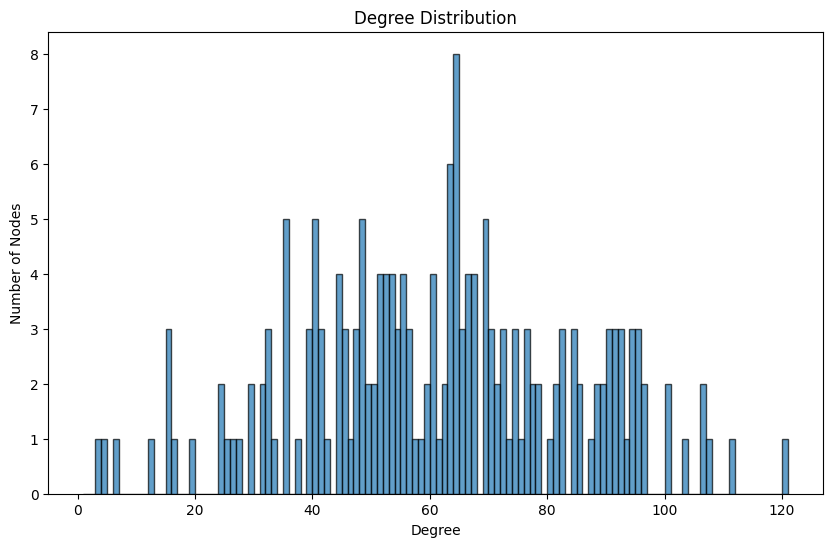

In [39]:
# Plot degree distribution
degrees = [d for n, d in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(1, max(degrees) + 1), edgecolor='black', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

In [40]:
# Calculate weighted degrees
weighted_degrees = dict(G.degree(weight='weight'))
weighted_in_degrees = dict(G.in_degree(weight='weight'))

# Calculate average weighted degree
avg_weighted_degree = sum(weighted_degrees.values()) / num_nodes
print(f"Average Weighted Degree: {avg_weighted_degree}")

Average Weighted Degree: 210.69189189189188


In [41]:
# Find the highest weighted degree and weighted in-degree
max_weighted_degree_node = max(weighted_degrees.items(), key=lambda x: x[1])
max_weighted_indegree_node = max(weighted_in_degrees.items(), key=lambda x: x[1])

print(f"Node with highest weighted degree: {max_weighted_degree_node[0]} ({max_weighted_degree_node[1]} weighted degrees)")
print(f"Node with highest weighted in-degree: {max_weighted_indegree_node[0]} ({max_weighted_indegree_node[1]} weighted in-degrees)")

Node with highest weighted degree: 0 (527 weighted degrees)
Node with highest weighted in-degree: 1 (374 weighted in-degrees)


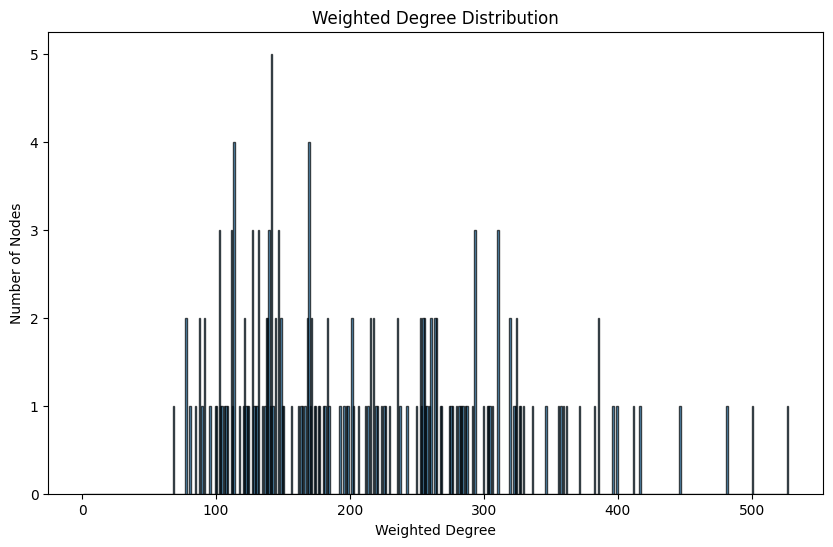

In [42]:
# Plot weighted degree distribution
weighted_degrees_values = list(weighted_degrees.values())
plt.figure(figsize=(10, 6))
plt.hist(weighted_degrees_values, bins=range(1, int(max(weighted_degrees_values)) + 1), edgecolor='black', alpha=0.7)
plt.title('Weighted Degree Distribution')
plt.xlabel('Weighted Degree')
plt.ylabel('Number of Nodes')
plt.show()

In [43]:
# Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank_centrality = nx.pagerank(G)

print("\nDegree Centrality:")
print(degree_centrality)
print("\nBetweenness Centrality:")
print(betweenness_centrality)
print("\nCloseness Centrality:")
print(closeness_centrality)
print("\nEigenvector Centrality:")
print(eigenvector_centrality)
print("\nPageRank Centrality:")
print(pagerank_centrality)


Degree Centrality:
{0: 0.42391304347826086, 1: 0.6032608695652174, 2: 0.375, 3: 0.46195652173913043, 4: 0.3913043478260869, 5: 0.657608695652174, 6: 0.40217391304347827, 7: 0.5217391304347826, 8: 0.483695652173913, 9: 0.5108695652173912, 10: 0.3641304347826087, 11: 0.4891304347826087, 12: 0.3641304347826087, 13: 0.5, 14: 0.28804347826086957, 15: 0.5, 16: 0.33152173913043476, 17: 0.45652173913043476, 18: 0.3913043478260869, 19: 0.22826086956521738, 20: 0.3532608695652174, 21: 0.43478260869565216, 22: 0.45652173913043476, 23: 0.29891304347826086, 24: 0.5434782608695652, 25: 0.5434782608695652, 26: 0.44021739130434784, 27: 0.5760869565217391, 28: 0.5, 29: 0.5217391304347826, 30: 0.5815217391304348, 31: 0.5163043478260869, 32: 0.4076086956521739, 33: 0.3913043478260869, 34: 0.45652173913043476, 35: 0.22282608695652173, 36: 0.3641304347826087, 37: 0.34782608695652173, 38: 0.5163043478260869, 39: 0.3804347826086956, 40: 0.4184782608695652, 41: 0.5597826086956521, 42: 0.5054347826086957, 43:

In [44]:
# Save centrality measures to nodes_df for later use
nodes_df['degree_centrality'] = nodes_df['id'].map(degree_centrality)
nodes_df['betweenness_centrality'] = nodes_df['id'].map(betweenness_centrality)
nodes_df['closeness_centrality'] = nodes_df['id'].map(closeness_centrality)
nodes_df['eigenvector_centrality'] = nodes_df['id'].map(eigenvector_centrality)
nodes_df['pagerank_centrality'] = nodes_df['id'].map(pagerank_centrality)

# Save the updated nodes dataframe
nodes_df.to_csv('nodes_with_centrality.csv', index=False)

In [45]:
nodes_df

,label,count,id,goals_for,goals_against,wins,losses,per_win,per_loss,modularity_class,color,in_degree,out_degree,degree,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank_centrality
0,Thailand,536,0,950.0,876.0,269,267,0.501866,0.498134,0,tab:blue,38,40,78,0.423913,0.015478,0.522727,0.023553,0.006491
1,South Korea,512,1,1185.0,435.0,384,128,0.750000,0.250000,0,tab:blue,59,52,111,0.603261,0.038786,0.587859,0.074283,0.014469
2,Malaysia,496,2,950.0,793.0,258,238,0.520161,0.479839,0,tab:blue,33,36,69,0.375000,0.010579,0.500000,0.020311,0.006229
3,Brazil,447,3,1140.0,420.0,349,98,0.780761,0.219239,2,tab:green,61,24,85,0.461957,0.009216,0.591640,0.164169,0.027777
4,Indonesia,424,4,808.0,746.0,207,217,0.488208,0.511792,0,tab:blue,31,41,72,0.391304,0.013652,0.469388,0.018610,0.004826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Brunei,102,180,75.0,364.0,15,87,0.147059,0.852941,0,tab:blue,6,18,24,0.130435,0.001347,0.333938,0.001355,0.000902
181,Papua New Guinea,101,181,278.0,217.0,46,55,0.455446,0.544554,1,tab:orange,8,8,16,0.086957,0.003557,0.369478,0.001708,0.001515
182,Eswatini,101,182,88.0,193.0,31,70,0.306931,0.693069,6,tab:pink,16,29,45,0.244565,0.000291,0.351145,0.008905,0.001566
183,Kyrgyzstan,100,183,138.0,163.0,43,57,0.430000,0.570000,0,tab:blue,16,23,39,0.211957,0.000313,0.368737,0.005138,0.001372


In [46]:
# Extract centrality measures from nodes_df
top_nodes_degree = nodes_df.nlargest(10, 'degree_centrality')
top_nodes_betweenness = nodes_df.nlargest(10, 'betweenness_centrality')
top_nodes_closeness = nodes_df.nlargest(10, 'closeness_centrality')
top_nodes_eigenvector = nodes_df.nlargest(10, 'eigenvector_centrality')
top_nodes_pagerank = nodes_df.nlargest(10, 'pagerank_centrality')

# Plot bar graph for top 10 countries for each centrality measure
def plot_top_countries(nodes_df, title):
    plt.figure(figsize=(12, 6))
    plt.bar(nodes_df['label'], nodes_df['degree'], alpha=0.7, label='Degree')
    plt.bar(nodes_df['label'], nodes_df['in_degree'], alpha=0.7, label='In-Degree')
    plt.bar(nodes_df['label'], nodes_df['out_degree'], alpha=0.7, label='Out-Degree')
    plt.xlabel('Country')
    plt.ylabel('Centrality Measure')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

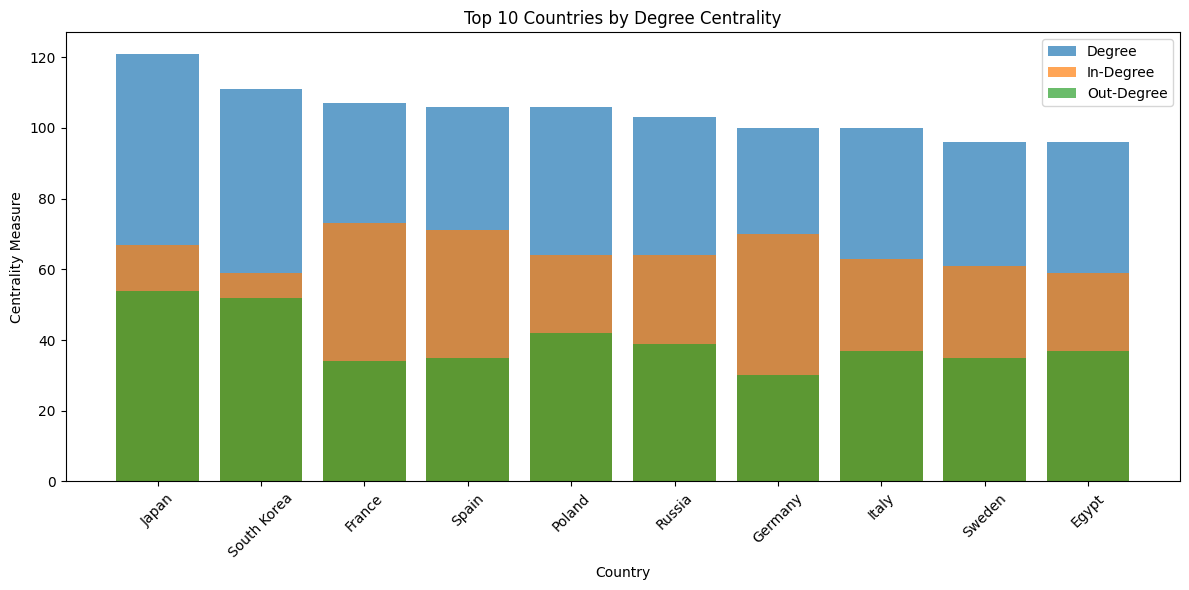

In [47]:

# Plot for degree centrality
plot_top_countries(top_nodes_degree[['label', 'degree', 'in_degree', 'out_degree']], 'Top 10 Countries by Degree Centrality')


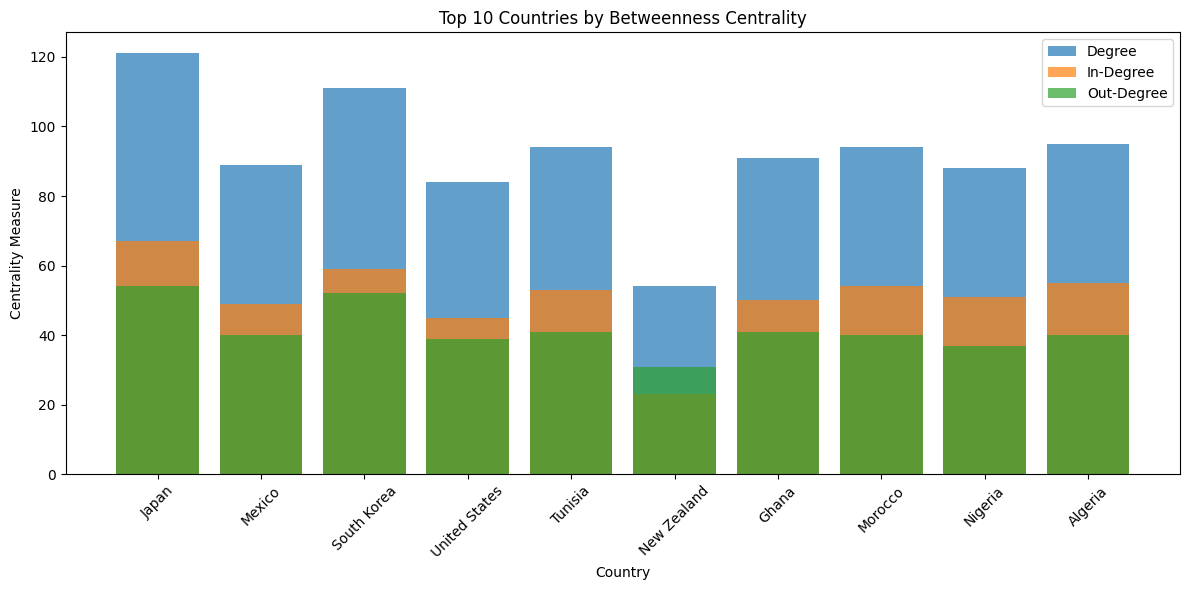

In [48]:
# Plot for betweenness centrality
plot_top_countries(top_nodes_betweenness[['label', 'degree', 'in_degree', 'out_degree']], 'Top 10 Countries by Betweenness Centrality')

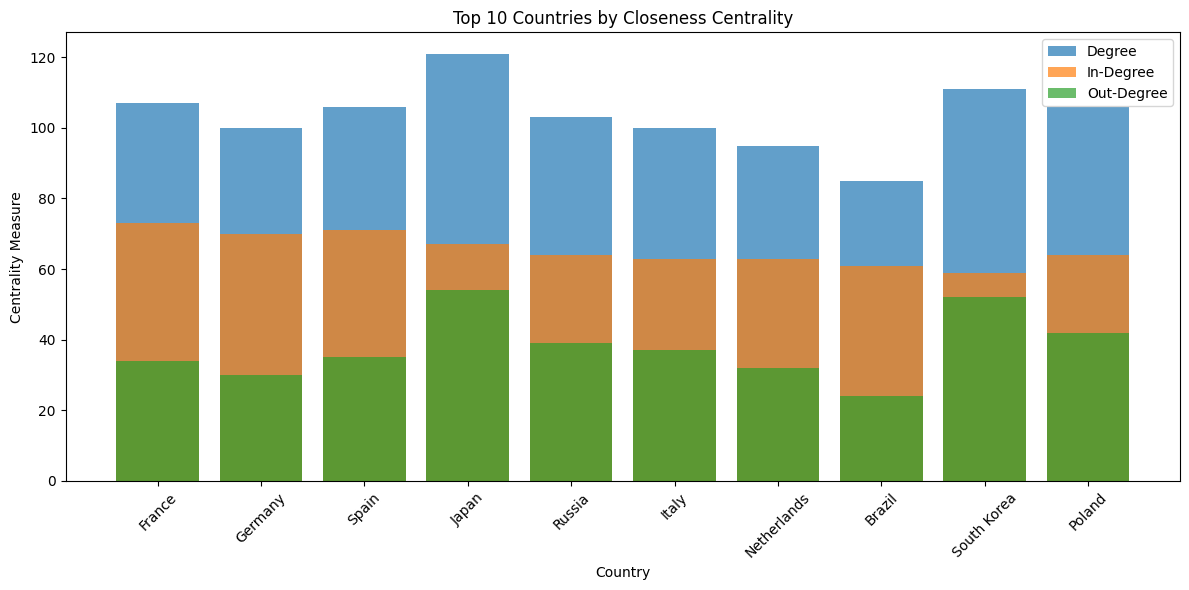

In [49]:
# Plot for closeness centrality
plot_top_countries(top_nodes_closeness[['label', 'degree', 'in_degree', 'out_degree']], 'Top 10 Countries by Closeness Centrality')

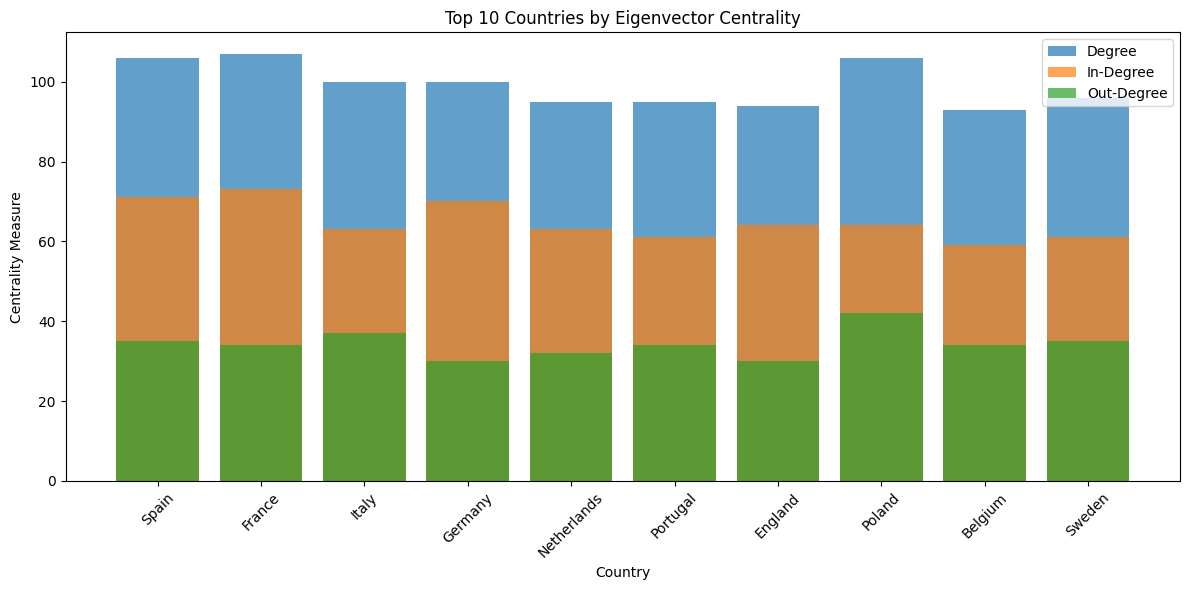

In [50]:
# Plot for eigenvector centrality
plot_top_countries(top_nodes_eigenvector[['label', 'degree', 'in_degree', 'out_degree']], 'Top 10 Countries by Eigenvector Centrality')

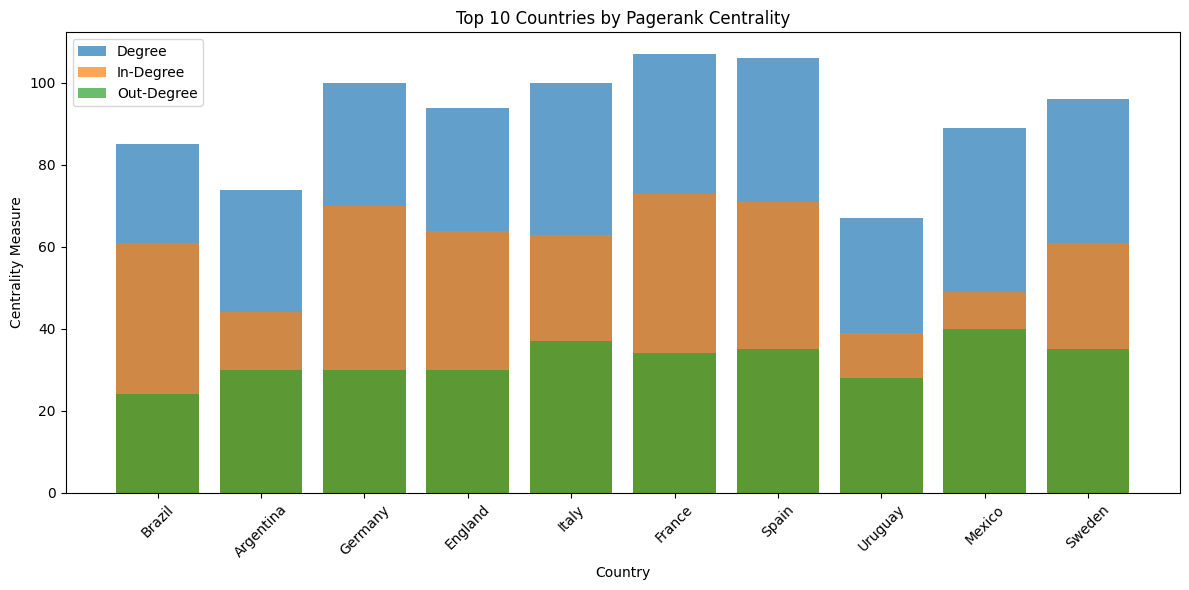

In [51]:
# Plot for eigenvector centrality
plot_top_countries(top_nodes_pagerank[['label', 'degree', 'in_degree', 'out_degree']], 'Top 10 Countries by Pagerank Centrality')

In [52]:
# Calculate average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")

Average Clustering Coefficient: 0.5657938485786951


Graph is not strongly connected, thus we cannot calculate the average shortest path length.
Also Diamter cannot be calculated due to infinite path length as the digraph is not strongly connected.

In [53]:
triadic_closure = nx.transitivity(G)

print(f"Triadic Closure: {triadic_closure}")

Triadic Closure: 0.5796832192730459


In [54]:
# Convert the directed graph to undirected
G_undirected = G.to_undirected()

# Find bridges in the undirected graph
bridges = list(nx.bridges(G_undirected))

# Print or process the bridges found
if bridges:
    print(f"Bridges found in the undirected graph: {bridges}")
else:
    print("No bridges found in the undirected graph.")

No bridges found in the undirected graph.


In [55]:
# Calculate the number of triangles
triangles_dict = nx.triangles(G_undirected)
num_triangles = sum(triangles_dict.values()) // 3  # Each triangle is counted 3 times

print(f"Number of Triangles in the Graph: {num_triangles}")

Number of Triangles in the Graph: 37861


In [56]:
# Calculate graph density
graph_density = nx.density(G)
print(f"Graph Density: {graph_density}")

Graph Density: 0.16533490011750882


In [57]:
scc = list(nx.strongly_connected_components(G))
print(f"Number of Strongly Connected Components: {len(scc)}")

Number of Strongly Connected Components: 3


In [60]:
import community

In [66]:
# Louvain Method
partition_louvain = community.best_partition(G_undirected)

# Label Propagation Algorithm (LPA)
partition_lpa = nx.community.label_propagation.label_propagation_communities(G_undirected)
partition_lpa = {node: idx for idx, comm in enumerate(partition_lpa) for node in comm}

# Kernighan-Lin Algorithm (for bipartite graphs)
# Convert to undirected for Kernighan-Lin algorithm (if applicable)
G_undirected = G.to_undirected()
partition_kernighan_lin = nx.community.kernighan_lin_bisection(G_undirected)

# Compare results
print(f"Number of communities (Louvain): {len(set(partition_louvain.values()))}")
print(f"Number of communities (Label Propagation): {len(set(partition_lpa.values()))}")
print(f"Number of communities (Kernighan-Lin): {len(partition_kernighan_lin)}")

Number of communities (Louvain): 7
Number of communities (Label Propagation): 5
Number of communities (Kernighan-Lin): 2
